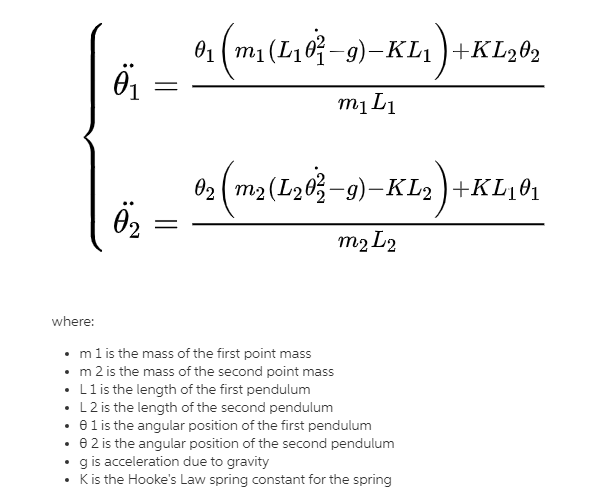

In [2]:
from IPython.display import Image
Image(filename = "formula.png", width = 500, height = 300)


In [9]:
from array import *
def vectorfield(w, t, p):
    """
    Defines the differential equations for the coupled spring-mass system.

    Arguments:
        w :  vector of the state variables:
                  w = [x1,y1,x2,y2]
        t :  time
        p :  vector of the parameters:
                  p = [m1,m2,k1,k2,L1,L2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2 = p

    # Create f = (x1',y1',x2',y2'):
    f = [y1,
         x1*(m1*(((L1*(y1**2))-9.8)-k1*L1)+k2*L2*x2),
         y2,
         x2*(m2*(((L2*(y2**2))-9.8)-k2*L2)+k1*L1*x1)]
    return f

In [17]:
# Use ODEINT to solve the differential equations defined by the vector field
from scipy.integrate import odeint

# Parameter values
# Masses:
m1 = 1.0
m2 = 1.0
# Spring constants
k1 = 20.0
k2 = 20.0
# Natural lengths
L1 = 1.0
L2 = 1.0

# Initial conditions
# x1 and x2 are the initial angular positions; y1 and y2 are the angular velocities
x1 = 0.5
y1 = 0.0
x2 = -0.5
y2 = 0.0

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

# Create the time samples for the output of the ODE solver.
t = [stoptime * float(i) / (numpoints - 1) for i in range(numpoints)]

# Pack up the parameters and initial conditions:
p = [m1, m2, k1, k2, L1, L2]
w0 = [x1, y1, x2, y2]

# Call the ODE solver.
wsol = odeint(vectorfield, w0, t, args=(p,),
              atol=abserr, rtol=relerr)


with open('two_springs.dat', 'w') as f:
    for t1, w1 in zip(t, wsol):
        print(t1, w1[0], w1[1], w1[2], w1[3], file=f)

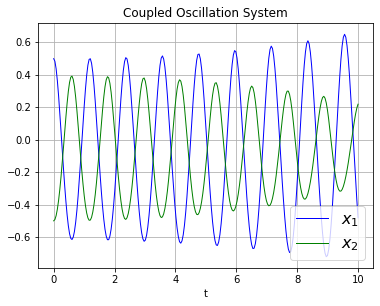

In [18]:
# Plot the solution that was generated

from numpy import loadtxt
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from matplotlib.font_manager import FontProperties

t, x1, xy, x2, y2 = loadtxt('two_springs.dat', unpack=True)

figure(1, figsize=(6, 4.5))

xlabel('t')
grid(True)
lw = 1

plot(t, x1, 'b', linewidth=lw)
plot(t, x2, 'g', linewidth=lw)

legend((r'$x_1$', r'$x_2$'), prop=FontProperties(size=16))
title('Coupled Oscillation System')
savefig('two_springs.png', dpi=100)